In [1]:
# IMporting the Libraries
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn import model_selection as ms
from sklearn.preprocessing import StandardScaler
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import load_digits
import warnings
warnings.filterwarnings('ignore')
import   matplotlib.style
plt.style.use('classic')

In [2]:
# importing the glass dataset
data=pd.read_csv('Heart_disease.csv')
data.columns=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']
data.shape

(293, 14)

In [3]:
# first 10 records in the dataset
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
1,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
2,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
3,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0
4,32,0,2,105,198,0,0,165,0,0.0,?,?,?,0
5,32,1,2,110,225,0,0,184,0,0.0,?,?,?,0
6,32,1,2,125,254,0,0,155,0,0.0,?,?,?,0
7,33,1,3,120,298,0,0,185,0,0.0,?,?,?,0
8,34,0,2,130,161,0,0,190,0,0.0,?,?,?,0
9,34,1,2,150,214,0,1,168,0,0.0,?,?,?,0


In [4]:
#Summary Statistics of the glass dataset
data.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,293,NaN,NaN,NaN,47.8942,7.73839,29,42,49,54,66
sex,293,NaN,NaN,NaN,0.723549,0.448007,0,0,1,1,1
cp,293,NaN,NaN,NaN,2.98635,0.965049,1,2,3,4,4
trestbps,293,32,120,65,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chol,293,153,?,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fbs,293,3,0,265,NaN,NaN,NaN,NaN,NaN,NaN,NaN
restecg,293,4,0,235,NaN,NaN,NaN,NaN,NaN,NaN,NaN
thalach,293,72,150,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exang,293,3,0,203,NaN,NaN,NaN,NaN,NaN,NaN,NaN
oldpeak,293,NaN,NaN,NaN,0.588055,0.909554,0,0,0,1,5


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293 entries, 0 to 292
Data columns (total 14 columns):
age         293 non-null int64
sex         293 non-null int64
cp          293 non-null int64
trestbps    293 non-null object
chol        293 non-null object
fbs         293 non-null object
restecg     293 non-null object
thalach     293 non-null object
exang       293 non-null object
oldpeak     293 non-null float64
slope       293 non-null object
ca          293 non-null object
thal        293 non-null object
num         293 non-null int64
dtypes: float64(1), int64(4), object(9)
memory usage: 32.1+ KB


In [6]:
# checking null values
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [7]:
# converting the ? to Nan values
data.replace('?',np.nan,inplace=True)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,29,1,2,120,243,0,0,160,0,0.0,NaN,NaN,NaN,0
1,29,1,2,140,NaN,0,0,170,0,0.0,NaN,NaN,NaN,0
2,30,0,1,170,237,0,1,170,0,0.0,NaN,NaN,6,0
3,31,0,2,100,219,0,1,150,0,0.0,NaN,NaN,NaN,0
4,32,0,2,105,198,0,0,165,0,0.0,NaN,NaN,NaN,0


In [8]:
data.isnull().sum()

age           0
sex           0
cp            0
trestbps      1
chol         23
fbs           8
restecg       1
thalach       1
exang         1
oldpeak       0
slope       189
ca          290
thal        265
num           0
dtype: int64

In [9]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps     object
chol         object
fbs          object
restecg      object
thalach      object
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
num           int64
dtype: object

## Null value treatment

In [10]:

data[data.trestbps.isnull()]


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
89,48,0,2,NaN,308,0,1,NaN,NaN,2.0,1,NaN,NaN,0


In [11]:
mod=data.trestbps.median()
print(mod)

data.trestbps.fillna(mod,inplace=True)



130.0


In [12]:
data[data.trestbps.isnull()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num


In [13]:
data[data.chol.isnull()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
1,29,1,2,140,NaN,0,0,170,0,0.0,NaN,NaN,NaN,0
30,39,1,2,120,NaN,0,1,146,0,2.0,1,NaN,NaN,0
33,39,1,2,130,NaN,0,0,120,0,0.0,NaN,NaN,NaN,0
43,40,1,3,140,NaN,0,0,188,0,0.0,NaN,NaN,NaN,0
64,43,0,3,150,NaN,0,0,175,0,0.0,NaN,NaN,3,0
71,45,0,2,180,NaN,0,0,180,0,0.0,NaN,NaN,NaN,0
74,45,1,3,135,NaN,0,0,110,0,0.0,NaN,NaN,NaN,0
85,47,0,3,130,NaN,0,0,145,0,2.0,2,NaN,NaN,0
90,48,0,2,120,NaN,1,1,148,0,0.0,NaN,NaN,NaN,0
96,48,1,2,100,NaN,0,0,100,0,0.0,NaN,NaN,NaN,0


In [14]:
data.chol.fillna(data.chol.median(),inplace=True)

In [15]:
data[data.chol.isnull()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num


In [16]:
data[data.restecg.isnull()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
267,55,1,1,140,295,0,NaN,136,0,0.0,NaN,NaN,NaN,1


In [17]:
data.restecg.value_counts()

0    235
1     52
2      5
Name: restecg, dtype: int64

In [18]:
data.restecg.fillna(0,inplace=True)
data[data.restecg.isnull()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num


In [19]:
data[data.thalach.isnull()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
89,48,0,2,130,308,0,1,NaN,NaN,2.0,1,NaN,NaN,0


In [20]:
me=data.thalach.median()
print(me)
data.thalach.fillna(me,inplace=True)

data[data.thalach.isnull()]

140.0


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num


In [21]:
data[data.exang.isnull()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
89,48,0,2,130,308,0,1,140,NaN,2.0,1,NaN,NaN,0


In [22]:
data.exang.value_counts()

0    203
1     89
Name: exang, dtype: int64

In [23]:
data.exang.fillna(0,inplace=True)
data[data.exang.isnull()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num


In [24]:
data[data.fbs.isnull()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
26,38,0,2,120,275,NaN,0,129,0,0.0,NaN,NaN,NaN,0
80,46,1,3,150,163,NaN,0,116,0,0.0,NaN,NaN,NaN,0
106,49,1,4,120,297,NaN,0,132,0,1.0,2,NaN,NaN,0
130,53,0,2,113,468,NaN,0,127,0,0.0,NaN,NaN,NaN,0
143,54,0,2,140,309,NaN,1,140,0,0.0,NaN,NaN,NaN,0
165,56,0,3,130,219,NaN,1,164,0,0.0,NaN,NaN,7,0
196,40,1,4,120,466,NaN,0,152,1,1.0,2,NaN,6,1
198,41,1,4,120,237,NaN,0,138,1,1.0,2,NaN,NaN,1


In [25]:
data.fbs.value_counts()

0    265
1     20
Name: fbs, dtype: int64

In [26]:
data.fbs.fillna(0,inplace=True)
data[data.fbs.isnull()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num


In [27]:
data.drop(['slope','thal','ca'],axis=1,inplace=True)

In [28]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
num         0
dtype: int64

## Data type conversion

In [29]:
#Data type conversion
data.trestbps=data.trestbps.astype('int64')
data.chol=data.chol.astype('int64')
data.thalach=data.thalach.astype('int64')
#data.slope=data.slope.astype('int64')
data.fbs=data.fbs.astype('int64')
data.restecg=data.restecg.astype('int64')
data.exang=data.exang.astype('int64')

In [30]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
num           int64
dtype: object

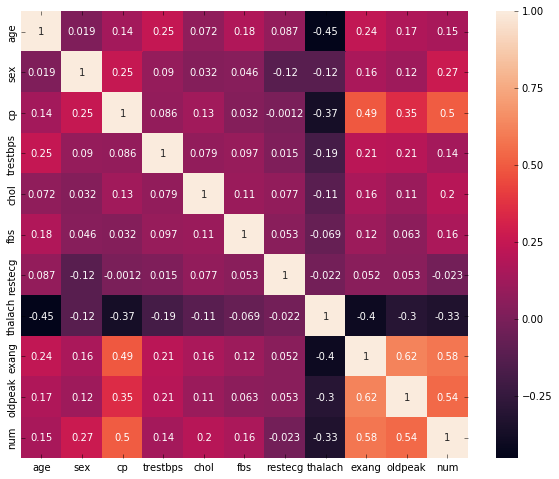

In [31]:
# Correlation matrix
plt.figure(figsize=[10,8])
sns.heatmap(data.corr(),annot=True)
plt.show()

In [32]:
#data.num=data.num.astype('category')

In [33]:
data.num.value_counts()

0    187
1    106
Name: num, dtype: int64

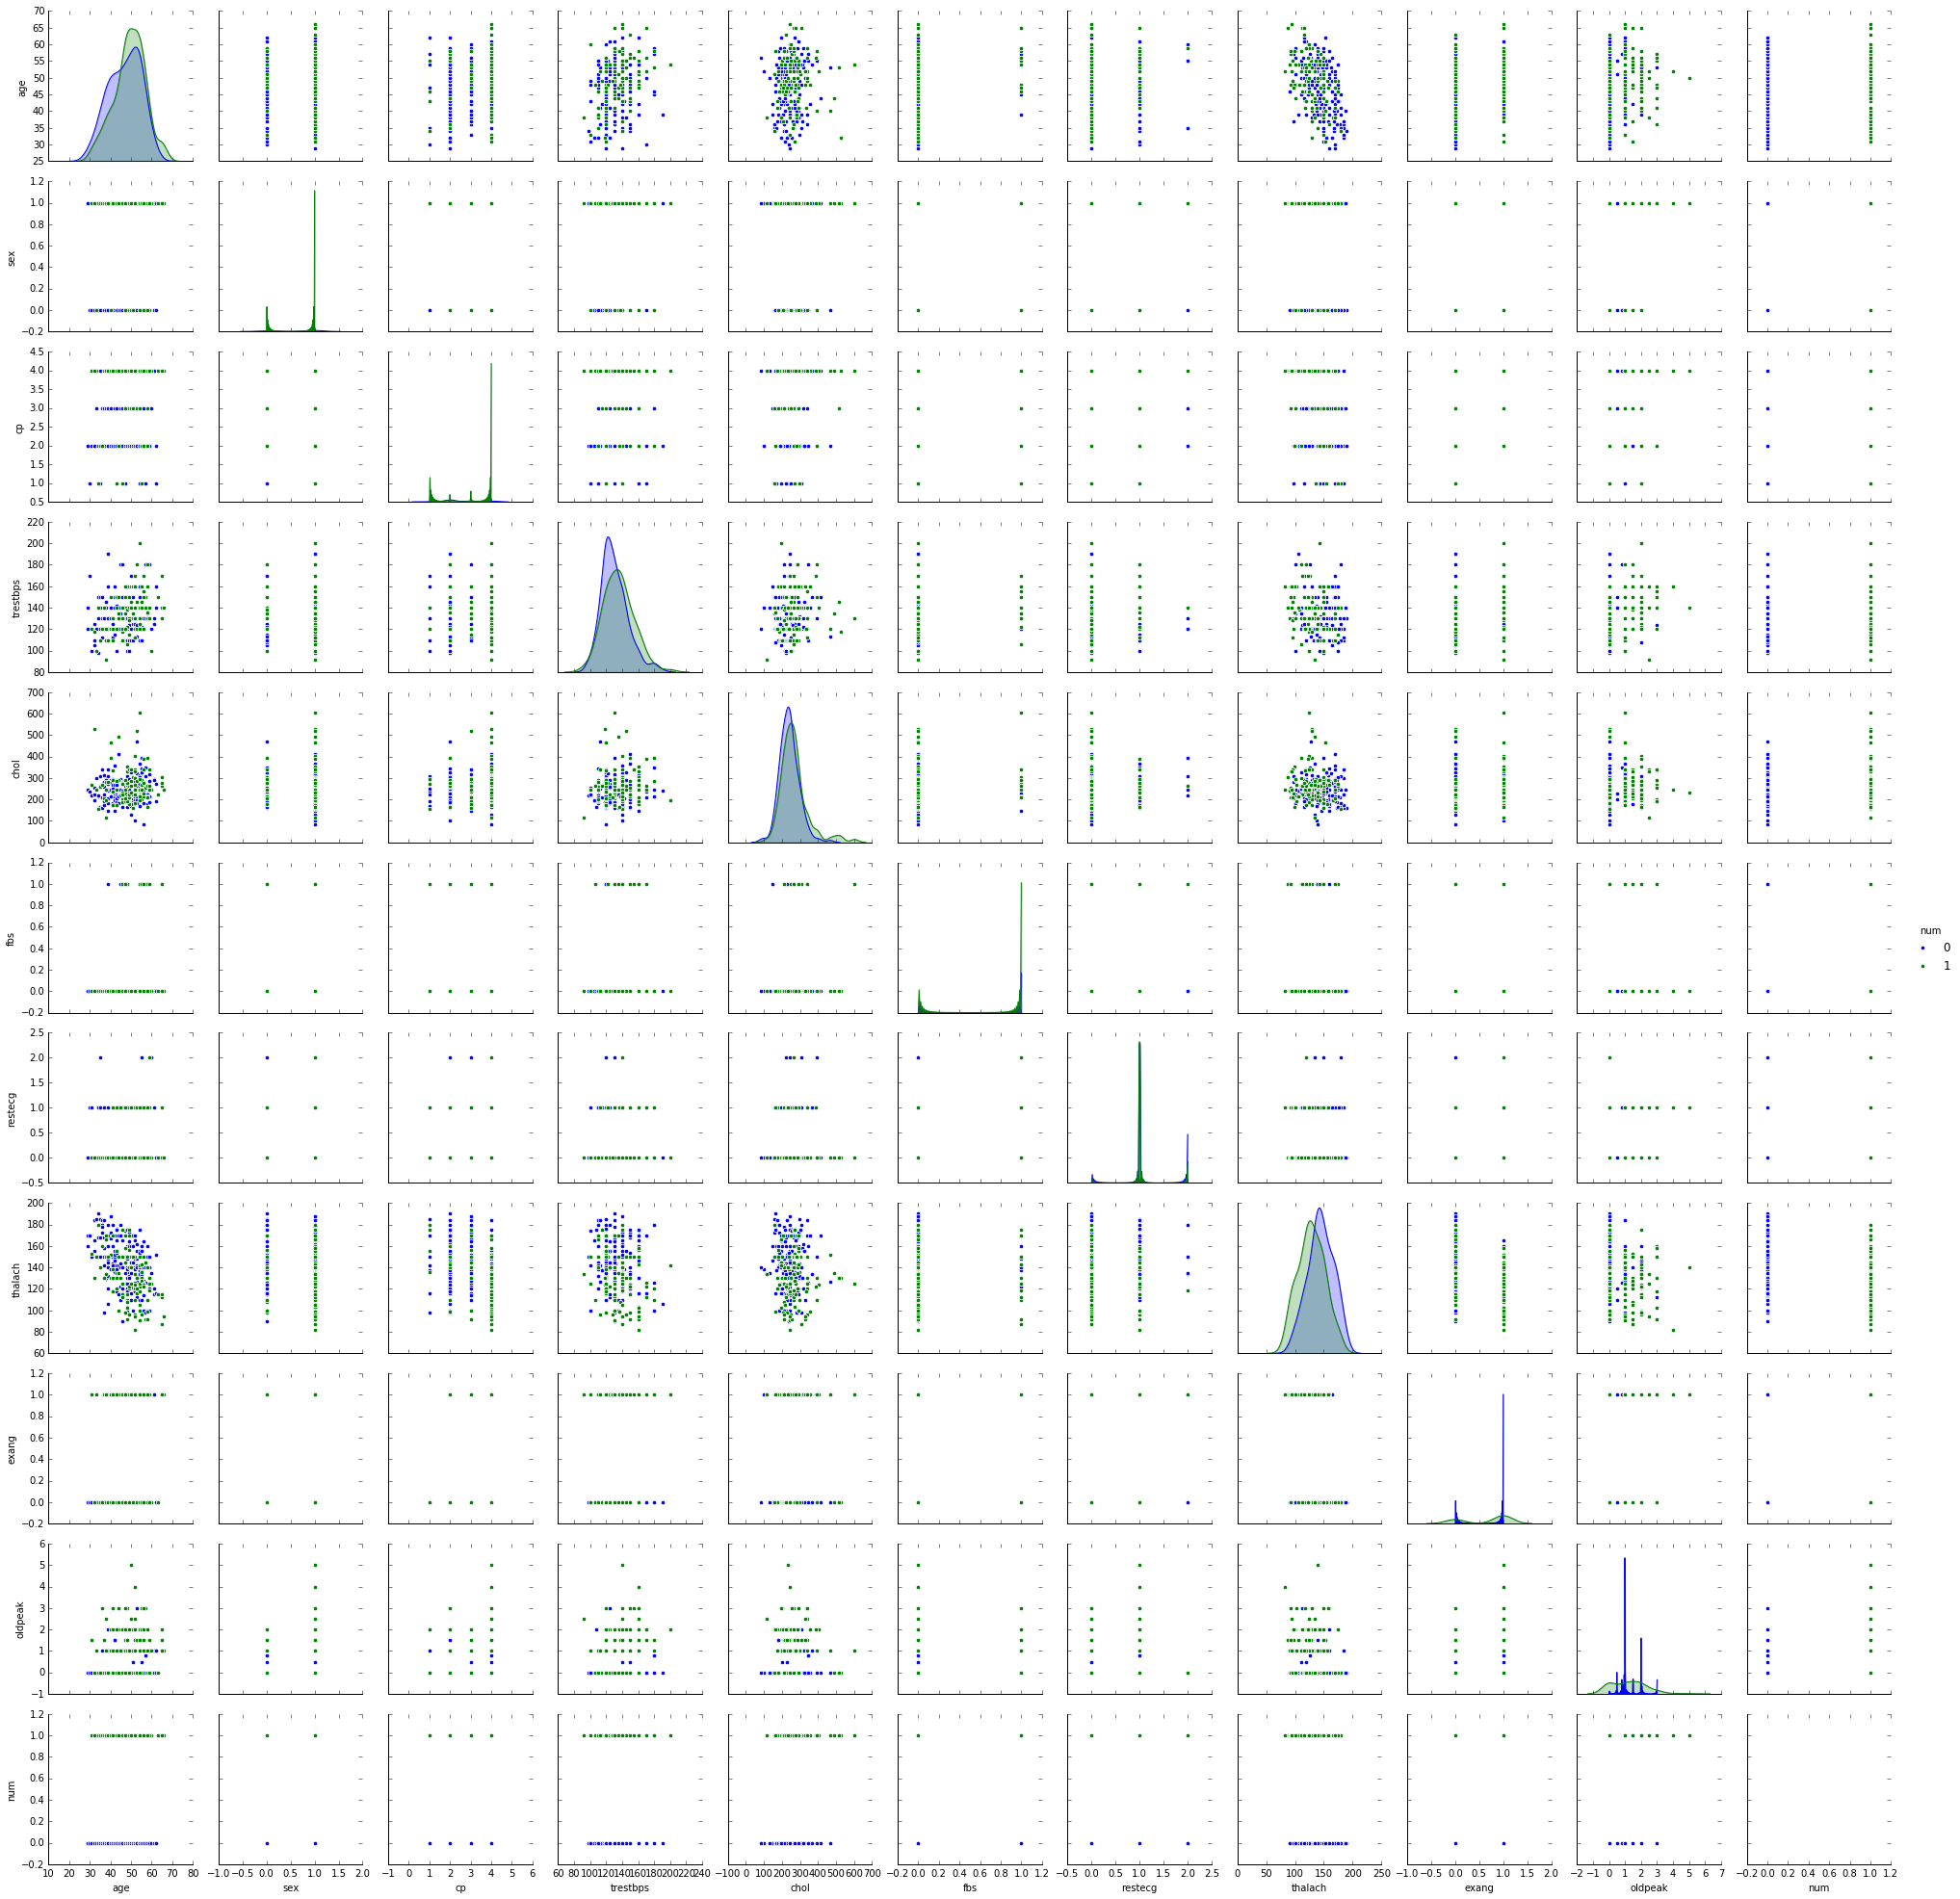

In [34]:
sns.pairplot(data,hue='num',diag_kind='kde')
plt.show()

# Continuous variabale analysis

age,Chol, trestbps,thalach,oldpeak are all continuous variable

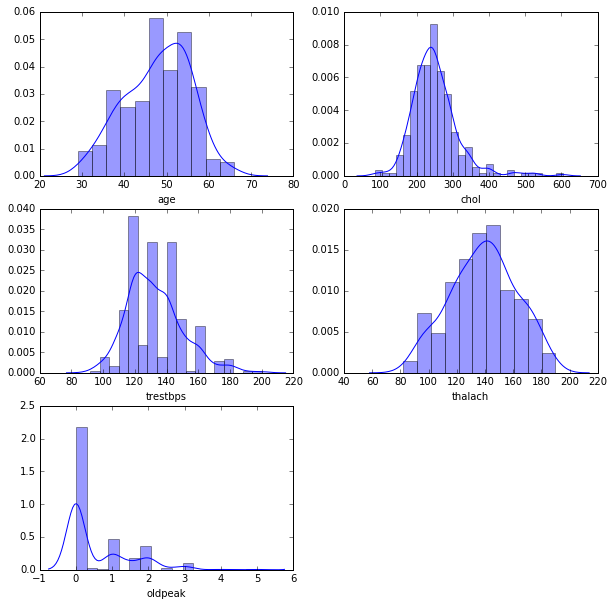

In [35]:
# distplto for Continuous variables
plt.figure(figsize=[10,10])
plt.subplot(321)
sns.distplot(data['age'])
plt.subplot(322)
sns.distplot(data['chol'])
plt.subplot(323)
sns.distplot(data['trestbps'])
plt.subplot(324)
sns.distplot(data['thalach'])
plt.subplot(325)
sns.distplot(data['oldpeak'])

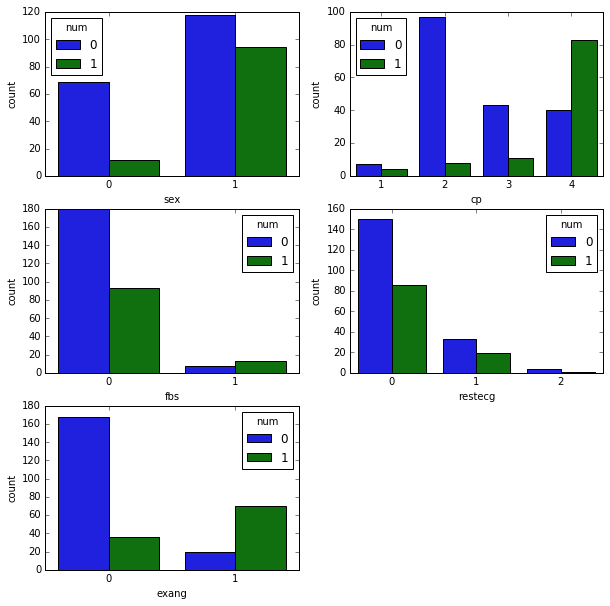

In [74]:
# distplto for Categorical variables
plt.figure(figsize=[10,10])
plt.subplot(321)
sns.countplot(data['sex'],hue=data['num'])
plt.subplot(322)
sns.countplot(data['cp'],hue=data['num'])
plt.subplot(323)
sns.countplot(data['fbs'],hue=data['num'])
plt.subplot(324)
sns.countplot(data['restecg'],hue=data['num'])
plt.subplot(325)
sns.countplot(data['exang'],hue=data['num'])

## Baseline models

In [36]:
#IDV's and DV's
x=data.drop('num',axis=1)
y=data[['num']]


In [37]:
from sklearn.model_selection import train_test_split

In [38]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

In [1]:
xtrain,xval,ytrain,yval=train_test_split(xtrain,ytrain,test_size=0.3,random_state=1)

NameError: name 'train_test_split' is not defined

In [40]:
# Logistic Regression
lormod=LogisticRegression()
lormod.fit(xtrain,ytrain)
print("The Baseline model accuracy for Val data is :",round(lormod.score(xval,yval)*100,2))
print("The Baseline model accuracy for test data is :",round(lormod.score(xtest,ytest)*100,2))


The Baseline model accuracy for Val data is : 85.48
The Baseline model accuracy for test data is : 87.5


In [41]:
#Decision Tree
dtmod=DecisionTreeClassifier()
dtmod.fit(xtrain,ytrain)
print("The Baseline model accuracy for Val data is :",round(dtmod.score(xval,yval)*100,2))
print("The Baseline model accuracy for test data is :",round(dtmod.score(xtest,ytest)*100,2))

The Baseline model accuracy for Val data is : 77.42
The Baseline model accuracy for test data is : 76.14


In [42]:
# KNN
knn=KNeighborsClassifier()
knn.fit(xtrain,ytrain)
print("The Baseline model accuracy for Val data is :",round(knn.score(xval,yval)*100,2))
print("The Baseline model accuracy for test data is :",round(knn.score(xtest,ytest)*100,2))

The Baseline model accuracy for Val data is : 66.13
The Baseline model accuracy for test data is : 67.05


In [43]:
# Naive Bayes
nb=GaussianNB()
nb.fit(xtrain,ytrain)
print("The Baseline model accuracy for Val data is :",round(nb.score(xval,yval)*100,2))
print("The Baseline model accuracy for test data is :",round(nb.score(xtest,ytest)*100,2))

The Baseline model accuracy for Val data is : 83.87
The Baseline model accuracy for test data is : 80.68


## Oversampling using SMOTE

The data is imbalanced 

In [44]:

data.num.value_counts()

0    187
1    106
Name: num, dtype: int64

In [45]:
from imblearn.over_sampling import SMOTE

In [46]:
print('before UpSampling, the shape of train_X: {}'.format(x.shape))
print('before UpSampling, the shape of train_y: {} \n'.format(y.shape))


sm = SMOTE(k_neighbors = 5, random_state=1)   #Synthetic Minority Over Sampling Technique
x1, y1 = sm.fit_sample(x,y)# resampled dataset
x1.shape

print('After UpSampling, the shape of train_X: {}'.format(x1.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y1.shape))



before UpSampling, the shape of train_X: (293, 10)
before UpSampling, the shape of train_y: (293, 1) 

After UpSampling, the shape of train_X: (374, 10)
After UpSampling, the shape of train_y: (374,) 



# Remodling model without Ensemble

In [47]:
xtrain1,xtest1,ytrain1,ytest1=train_test_split(x1,y1,test_size=0.2,random_state=1)

In [48]:
xtrain1,xval1,ytrain1,yval1=train_test_split(xtrain1,ytrain1,test_size=0.2,random_state=1)

In [49]:
# Logistic Regression
lormod=LogisticRegression()
lormod.fit(xtrain,ytrain)
print("The Baseline model accuracy for Val data is :",round(lormod.score(xval,yval)*100,2))
print("The Baseline model accuracy for test data is :",round(lormod.score(xtest,ytest)*100,2))


The Baseline model accuracy for Val data is : 85.48
The Baseline model accuracy for test data is : 87.5


In [50]:
#Decision Tree
dtmod=DecisionTreeClassifier()
dtmod.fit(xtrain1,ytrain1)
print("The Baseline model accuracy for Val data is :",round(dtmod.score(xval1,yval1)*100,2))
print("The Baseline model accuracy for test data is :",round(dtmod.score(xtest1,ytest1)*100,2))

The Baseline model accuracy for Val data is : 73.33
The Baseline model accuracy for test data is : 76.0


In [51]:
# KNN
knn=KNeighborsClassifier()
knn.fit(xtrain1,ytrain1)
print("The Baseline model accuracy for Val data is :",round(knn.score(xval1,yval1)*100,2))
print("The Baseline model accuracy for test data is :",round(knn.score(xtest1,ytest1)*100,2))

The Baseline model accuracy for Val data is : 70.0
The Baseline model accuracy for test data is : 74.67


In [52]:
# Naive Bayes
nb=GaussianNB()
nb.fit(xtrain1,ytrain1)
print("The Baseline model accuracy for Val data is :",round(nb.score(xval1,yval1)*100,2))
print("The Baseline model accuracy for test data is :",round(nb.score(xtest1,ytest1)*100,2))

The Baseline model accuracy for Val data is : 85.0
The Baseline model accuracy for test data is : 85.33


Decision Tree:  Performance Range is  (71.698 - 88.889) with a Varience error of (0.055432) and mean of 78.067
Naive Bayes:  Performance Range is  (79.245 - 87.037) with a Varience error of (0.032525) and mean of 82.330
Logistic Regression:  Performance Range is  (77.358 - 88.889) with a Varience error of (0.042908) and mean of 83.942
KNN:  Performance Range is  (56.604 - 75.926) with a Varience error of (0.068094) and mean of 68.149


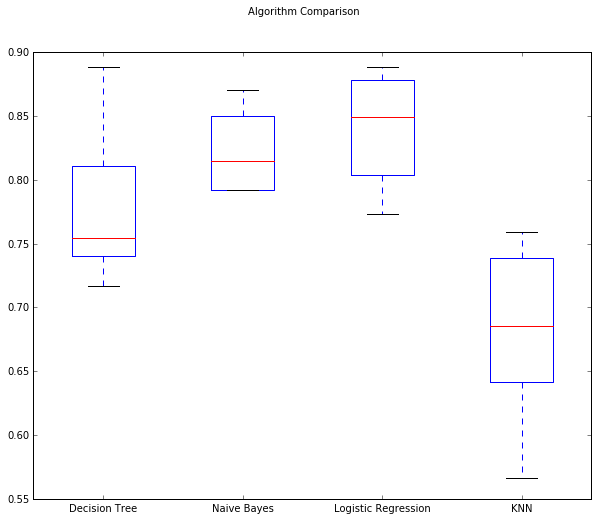

In [53]:
# kfold cross validation
from sklearn import model_selection
mod=[]
mod.append(('Decision Tree',dtmod))
mod.append(('Naive Bayes',nb))
mod.append(('Logistic Regression',lormod))
mod.append(('KNN',knn))
result=[]
names=[]
scoring='accuracy'
for name,model in mod:
    kfold=model_selection.KFold(n_splits=7,shuffle=True)# 5 fold cross validation function
    cv_results=model_selection.cross_val_score(model,x1,y1,cv=kfold,scoring='accuracy')
    result.append(cv_results)
    names.append(name)
    msg="%s:  Performance Range is  (%1.3f %s %1.3f) with a Varience error of (%f) and mean of %1.3f"%(name,cv_results.min()*100,'-',cv_results.max()*100,cv_results.std(),cv_results.mean()*100)
    print(msg)
# boxplot for the models

fig=plt.figure(figsize=[10,8])
fig.suptitle("Algorithm Comparison")
ax=fig.add_subplot(111)
plt.boxplot(result)
ax.set_xticklabels(names)
plt.show()


From the above Cross fold validation results we get to see that  Logistic Regression model has the better Accuracy and lowest varience error, followed by Naive Bayes in terms of accuracy score

# Summary of Logistic Regression

In [54]:
from statsmodels.api import add_constant 
import statsmodels.discrete.discrete_model as sm
xa=add_constant(x1) #adding a constant as intercept else the line is forced plotted thru origin
log_it=sm.Logit(y1,xa)
r=log_it.fit()
r.summary()

Optimization terminated successfully.
         Current function value: 0.348916
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  374
Model:                          Logit   Df Residuals:                      363
Method:                           MLE   Df Model:                           10
Date:                Thu, 07 Feb 2019   Pseudo R-squ.:                  0.4966
Time:                        12:47:55   Log-Likelihood:                -130.49
converged:                       True   LL-Null:                       -259.24
                                        LLR p-value:                 1.446e-49
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.8640      2.588     -1.879      0.060      -9.937       0.209
x1            -0.0033      0.025     -0.131      0.896      -0.053       0.046
x2             1.7683      0.452      3.916      0.000       0.883       2.654
x3             0.9876      0.197      5.008      0.000       0.601       1.374
x4            -0.0087      0.011     -0.825      0.410      -0.029       0.012
x5             0.0051      0.002      2.079      0.038       0.000       0.010
x6             1.6355      0.691      2.367      0.018       0.281       2.990
x7            -0.2659      0.407     -0.654      0.513      -1.063       0.531
x8            -0.0073      0.009     -0.835      0.404      -0.024       0.010
x9             1.2902      0.426      3.025      0.002       0.454       2.126
x10            1.2963      0.241      5.381      0.000       0.824       1.769
==============================================================================
"""

# Ensemble Models

In [55]:
from sklearn.ensemble import VotingClassifier
dtmod=DecisionTreeClassifier()
lrcl = LogisticRegression(random_state=1)
rfcl = RandomForestClassifier(random_state=1)
nbcl = GaussianNB()
bgcl = BaggingClassifier(base_estimator=lrcl, n_estimators=50 , random_state=1)  
adcl = AdaBoostClassifier(base_estimator=lrcl,n_estimators=50,random_state=1)
gbcl = GradientBoostingClassifier(n_estimators=50,random_state=1)
#the base_estimator can be null. The bagging classifer  will build it's own tree
#ensemble classifier
enclf = VotingClassifier(estimators = [('dt',dtmod),('lor', lrcl), ('rf', rfcl), ('nb', nbcl), ('bg', bgcl),('ad',adcl),('gb',gbcl)], voting = 'hard')

In [56]:
dtmod.fit(xtrain1,ytrain1)
lrcl.fit(xtrain1,ytrain1)
lrcl.fit(xtrain1,ytrain1)
nbcl.fit(xtrain1,ytrain1)
bgcl.fit(xtrain1,ytrain1)
gbcl.fit(xtrain1,ytrain1)
adcl.fit(xtrain1,ytrain1)
enclf.fit(xtrain1,ytrain1)



VotingClassifier(estimators=[('dt', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf...    subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False))],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None)

In [57]:
# cross fold validation 
for clf, label in zip([dtmod,lrcl , rfcl, nbcl, enclf, bgcl,adcl,gbcl], ['Decision tree','Logistic Regression', 'RandomForest', 'NaiveBayes', 'Ensemble', 'Bagging','AdaBoost','GradientBoost']):
    scores =ms.cross_val_score(clf, x1, y1, cv=5, scoring='accuracy')
    print("Accuracy: %0.02f (+/- %0.2f) [%s]" % (scores.mean()*100, scores.std(), label ))

Accuracy: 71.07 (+/- 0.11) [Decision tree]
Accuracy: 81.57 (+/- 0.05) [Logistic Regression]
Accuracy: 76.19 (+/- 0.10) [RandomForest]
Accuracy: 82.62 (+/- 0.05) [NaiveBayes]
Accuracy: 81.29 (+/- 0.05) [Ensemble]
Accuracy: 81.58 (+/- 0.05) [Bagging]
Accuracy: 81.58 (+/- 0.05) [AdaBoost]
Accuracy: 75.88 (+/- 0.12) [GradientBoost]


# Hyper parameter tunning

In [58]:
### for Random forest
param = {'max_depth': sp_randint(1,50)}

randomCV = RandomizedSearchCV(rfcl, param_distributions=param, n_iter=200) #default cv = 3
randomCV.fit(x,y)

print(randomCV.best_params_)

{'max_depth': 1}


In [59]:
### for Gradient  Boost
param = {'max_depth': sp_randint(1,50)}

randomCV = RandomizedSearchCV(gbcl, param_distributions=param, n_iter=200) #default cv = 3
randomCV.fit(x,y)

print(randomCV.best_params_)

{'max_depth': 1}


In [60]:
### for Decision tree
param = {'max_depth': sp_randint(1,50)}

randomCV = RandomizedSearchCV(dtmod, param_distributions=param, n_iter=200) #default cv = 3
randomCV.fit(x,y)

print(randomCV.best_params_)

{'max_depth': 1}


In [61]:
x1.shape

(374, 10)

### Remodelling using hyper parameters

In [62]:
x1=pd.DataFrame(x1,columns=x.columns)
y1=pd.DataFrame(y1,columns=['num'])

In [63]:
data_new=pd.concat([x1,y1],axis=1)
from sklearn.utils import resample
iters = 100
values = data_new.values

n_size = int(len(data_new) * 0.50) 

DecisionTree = []
RandomForest = []
LogisticReg = []
BaggingClass = []
GradientBoost = []
AdaBoost=[]
Ensemble=[]
NaiveBayes=[]

for i in range(iters):
    train = resample(values, n_samples = n_size)
    test = np.array([x for x in values if x.tolist() not in train.tolist()])
    
         
    DTC = DecisionTreeClassifier(max_depth = 1)
    DTC.fit(train[:,:-1],train[:,-1])
    DTCscore = DTC.score(test[:,:-1],test[:,-1])
    DecisionTree.append(DTCscore)
    
    LOR = LogisticRegression()
    LOR.fit(train[:,:-1],train[:,-1])
    LORscore = LOR.score(test[:,:-1],test[:,-1])
    LogisticReg.append(LORscore)
    
    RFC = RandomForestClassifier(max_depth = 1)
    RFC.fit(train[:,:-1],train[:,-1])
    RFCscore = RFC.score(test[:,:-1],test[:,-1])
    RandomForest.append(RFCscore)
    
    NB = GaussianNB()
    NB.fit(train[:,:-1],train[:,-1])
    NBscore = NB.score(test[:,:-1],test[:,-1])
    NaiveBayes.append(NBscore)
        
    BGC = BaggingClassifier(n_estimators = 50)
    BGC.fit(train[:,:-1],train[:,-1])
    BGCscore = BGC.score(test[:,:-1],test[:,-1])
    BaggingClass.append(BGCscore)
    
    GBC = GradientBoostingClassifier(max_depth = 1)
    GBC.fit(train[:,:-1],train[:,-1])
    GBCscore = GBC.score(test[:,:-1],test[:,-1])
    GradientBoost.append(GBCscore)
    
        
    ADB = AdaBoostClassifier(n_estimators=50)
    ADB.fit(train[:,:-1],train[:,-1])
    ADBscore = ADB.score(test[:,:-1],test[:,-1])
    AdaBoost.append(ADBscore)
    
        
    ENS = VotingClassifier(estimators = [('dt',dtmod),('lor', lrcl), ('rf', rfcl), ('nb', nbcl), ('bg', bgcl),('ad',adcl),('gb',gbcl)], voting = 'hard')
    ENS.fit(train[:,:-1],train[:,-1])
    ENSscore = ENS.score(test[:,:-1],test[:,-1])
    Ensemble.append(ENSscore)
    

## Confidence Intervals

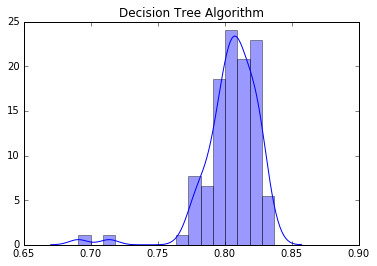

The  95 % confidence interval is:  77.34 % to  83.09 %


In [64]:
sns.distplot(DecisionTree)
plt.title('Decision Tree Algorithm')
plt.show()

confidence = 95
lower = (100-confidence)/2
upper = confidence + lower

print('The ',confidence, '% confidence interval is: ',round(np.percentile(DecisionTree,lower),4)*100,
      '% to ',round(np.percentile(DecisionTree,upper),4)*100,'%')

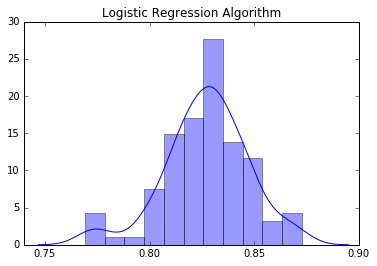

The  95 % confidence interval is:  77.55 % to  86.56 %


In [65]:
sns.distplot(LogisticReg)
plt.title('Logistic Regression Algorithm')
plt.show()

confidence = 95
lower = (100-confidence)/2
upper = confidence + lower

print('The ',confidence, '% confidence interval is: ',round(np.percentile(LogisticReg,lower),4)*100,
      '% to ',round(np.percentile(LogisticReg,upper),4)*100,'%')

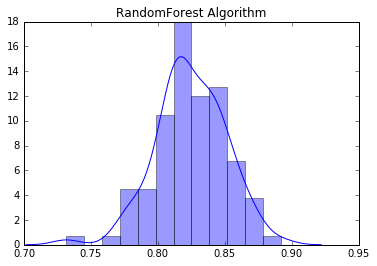

The  95 % confidence interval is:  77.51 % to  87.21 %


In [66]:
sns.distplot(RandomForest)
plt.title('RandomForest Algorithm')
plt.show()

confidence = 95
lower = (100-confidence)/2
upper = confidence + lower

print('The ',confidence, '% confidence interval is: ',round(np.percentile(RandomForest,lower),4)*100,
      '% to ',round(np.percentile(RandomForest,upper),4)*100,'%')

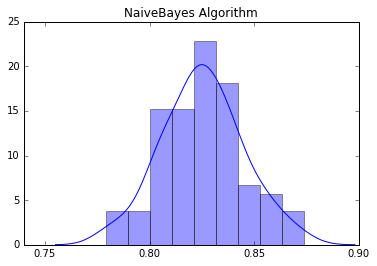

The  95 % confidence interval is:  78.60000000000001 % to  86.50999999999999 %


In [67]:
sns.distplot(NaiveBayes)
plt.title('NaiveBayes Algorithm')
plt.show()

confidence = 95
lower = (100-confidence)/2
upper = confidence + lower

print('The ',confidence, '% confidence interval is: ',round(np.percentile(NaiveBayes,lower),4)*100,
      '% to ',round(np.percentile(NaiveBayes,upper),4)*100,'%')

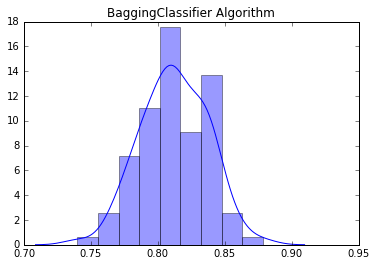

The  95 % confidence interval is:  76.8 % to  85.75 %


In [68]:
sns.distplot(BaggingClass)
plt.title('BaggingClassifier Algorithm')
plt.show()

confidence = 95
lower = (100-confidence)/2
upper = confidence + lower

print('The ',confidence, '% confidence interval is: ',round(np.percentile(BaggingClass,lower),4)*100,
      '% to ',round(np.percentile(BaggingClass,upper),4)*100,'%')

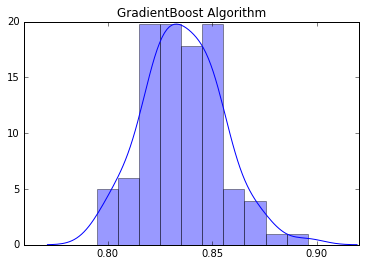

The  95 % confidence interval is:  80.22 % to  87.24 %


In [69]:
sns.distplot(GradientBoost)
plt.title('GradientBoost Algorithm')
plt.show()

confidence = 95
lower = (100-confidence)/2
upper = confidence + lower

print('The ',confidence, '% confidence interval is: ',round(np.percentile(GradientBoost,lower),4)*100,
      '% to ',round(np.percentile(GradientBoost,upper),4)*100,'%')

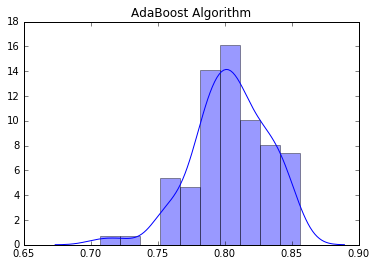

The  95 % confidence interval is:  75.28 % to  84.87 %


In [70]:
sns.distplot(AdaBoost)
plt.title('AdaBoost Algorithm')
plt.show()

confidence = 95
lower = (100-confidence)/2
upper = confidence + lower

print('The ',confidence, '% confidence interval is: ',round(np.percentile(AdaBoost,lower),4)*100,
      '% to ',round(np.percentile(AdaBoost,upper),4)*100,'%')

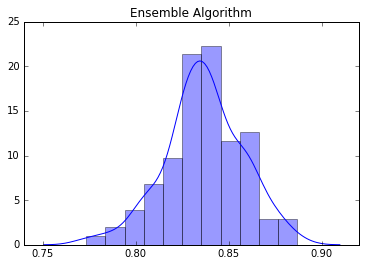

The  95 % confidence interval is:  79.43 % to  87.57000000000001 %


In [71]:
sns.distplot(Ensemble)
plt.title('Ensemble Algorithm')
plt.show()

confidence = 95
lower = (100-confidence)/2
upper = confidence + lower

print('The ',confidence, '% confidence interval is: ',round(np.percentile(Ensemble,lower),4)*100,
      '% to ',round(np.percentile(Ensemble,upper),4)*100,'%')

# So the Best Ensemble model that can  be used by MD's in underserved communities is Gradient Boost with CI (80-87%) or Hybrid Ensemble model with CI (79-87%)